In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
import scipy.stats as stats
import seaborn as se
from pandas_datareader import data
from datetime import datetime
%matplotlib inline
se.set_style('whitegrid')

tech_list=['AAPL','GOOG','MSFT','AMZN']

end=datetime.now()

start=datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock]=data.DataReader(stock,'yahoo',start,end)

aapl=pd.DataFrame(AAPL)
goog=pd.DataFrame(GOOG)
msft=pd.DataFrame(MSFT)
amzn=pd.DataFrame(AMZN)

c:\users\mitts\appdata\local\programs\python\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,260.571739,254.748064,257.247154,257.948023,3.349210e+07,256.550664
std,43.466691,42.291844,42.658357,43.184036,1.719629e+07,43.689275
min,193.589996,190.300003,191.550003,192.580002,1.136200e+07,190.308762
25%,218.029999,211.710007,214.839996,214.169998,2.184720e+07,212.448273
50%,263.109985,256.850006,258.690002,261.739990,2.825340e+07,260.415344
75%,300.579987,289.230011,295.059998,293.799988,3.813280e+07,293.006836
max,345.609985,332.010010,332.140015,343.989990,1.067212e+08,343.989990


In [3]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-06-10 to 2020-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


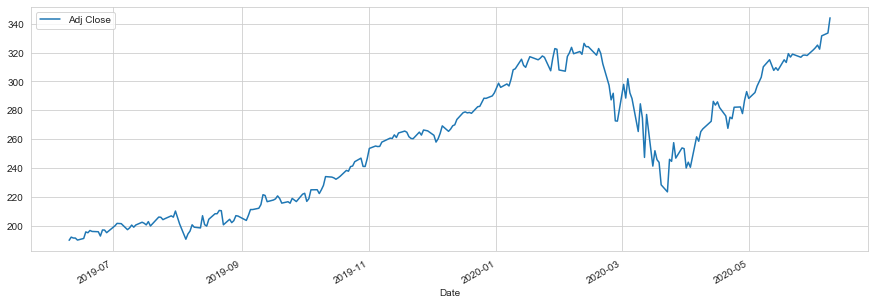

In [4]:
aapl['Adj Close'].plot(legend=True,figsize=(15,5))

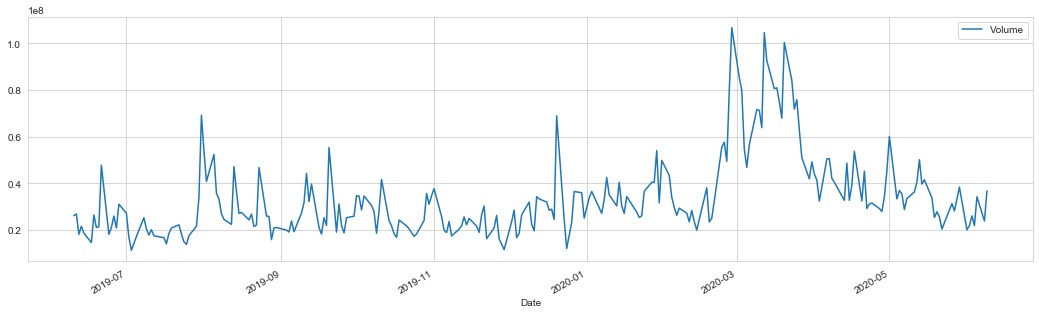

In [5]:
aapl['Volume'].plot(legend=True,figsize=(18,5))

In [6]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name=str('MA for '+str(ma)+'days')
    aapl[column_name]=aapl['Adj Close'].rolling(ma).mean()

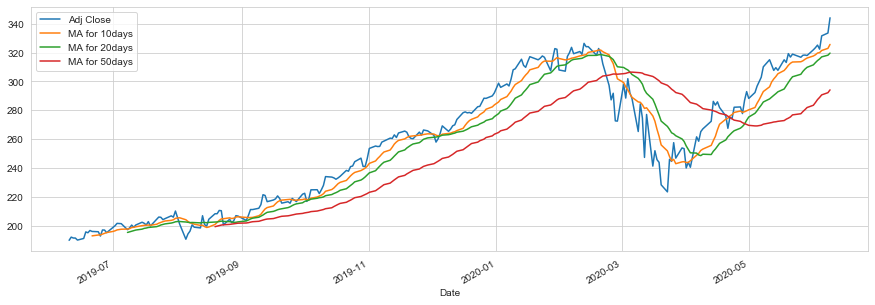

In [7]:
aapl[['Adj Close','MA for 10days','MA for 20days','MA for 50days']].plot(subplots=False,figsize=(15,5))

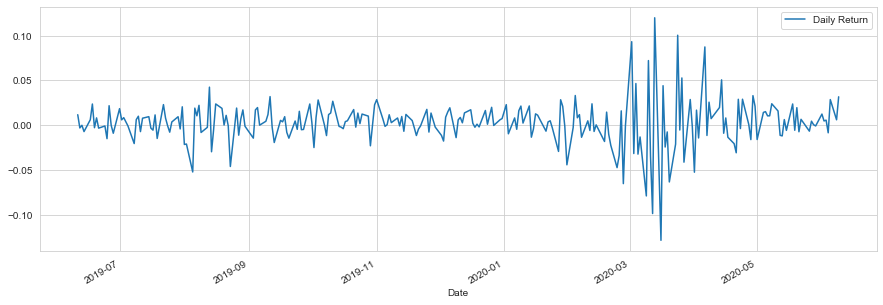

In [8]:
aapl['Daily Return']=aapl['Adj Close'].pct_change()
aapl['Daily Return'].plot(legend=True,figsize=(15,5))

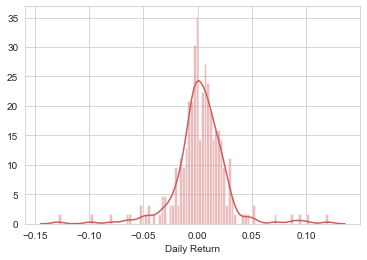

In [9]:
se.distplot(aapl['Daily Return'].dropna(),bins=100,color='indianred')

In [10]:
closing=data.DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-10,190.308762,1080.380005,130.988159,1860.630005
2019-06-11,192.512451,1078.719971,130.494232,1863.699951
2019-06-12,191.899780,1077.030029,129.891647,1855.319946
2019-06-13,191.860229,1088.770020,130.711548,1870.300049
2019-06-14,190.466873,1085.349976,130.839981,1869.670044


In [11]:
tech_rets=closing.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-06-10,NaN,NaN,NaN,NaN
2019-06-11,0.011580,-0.001537,-0.003771,0.001650
2019-06-12,-0.003183,-0.001567,-0.004618,-0.004496
2019-06-13,-0.000206,0.010900,0.006312,0.008074
2019-06-14,-0.007262,-0.003141,0.000983,-0.000337


c:\users\mitts\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


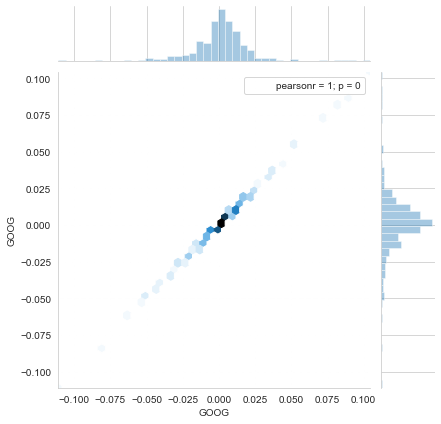

In [12]:
b=se.jointplot('GOOG','GOOG',tech_rets,kind='hex')
b.annotate(stats.pearsonr)

c:\users\mitts\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


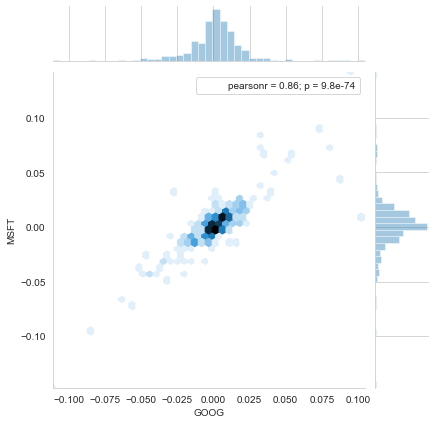

In [13]:
a=se.jointplot('GOOG','MSFT',tech_rets,kind='hex')
a.annotate(stats.pearsonr)

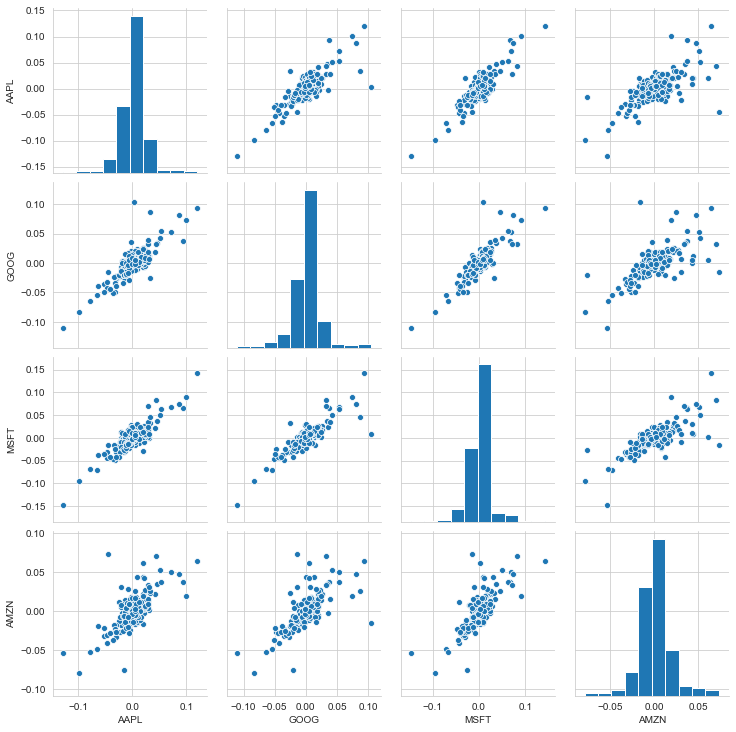

In [14]:
se.pairplot(tech_rets.dropna())

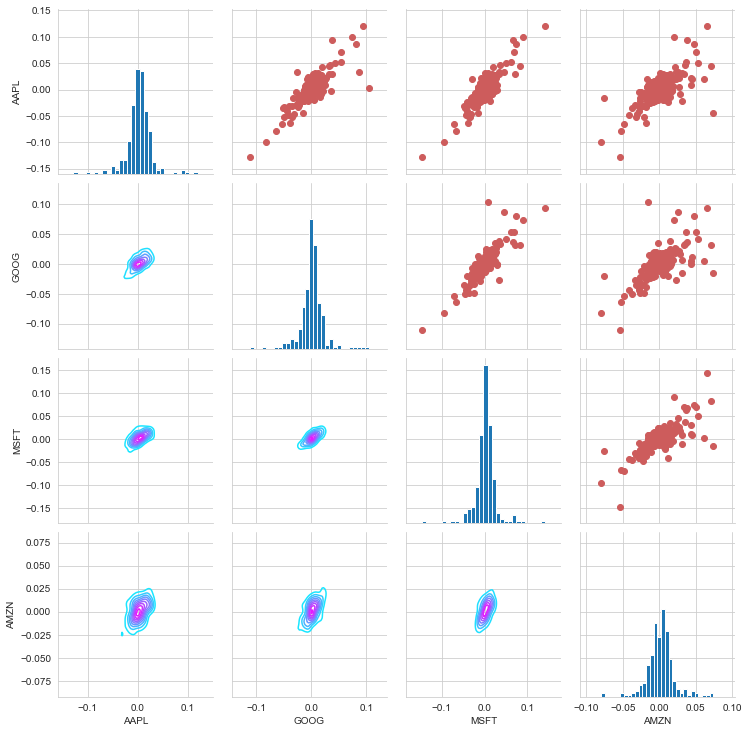

In [15]:
fig=se.PairGrid(tech_rets.dropna())

fig.map_upper(p.scatter,color='indianred')
fig.map_lower(se.kdeplot,cmap='cool')
fig.map_diag(p.hist,bins=30)

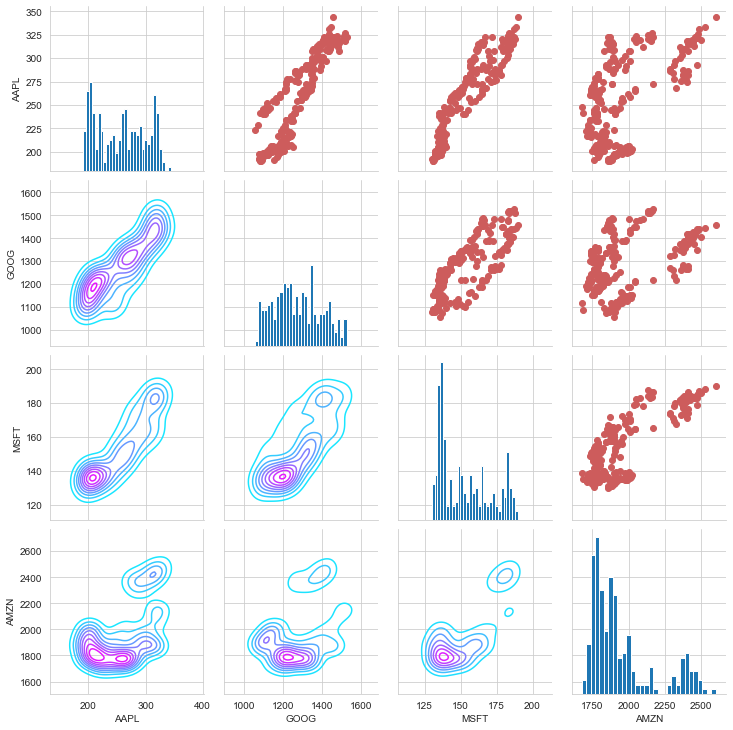

In [16]:
fig=se.PairGrid(closing.dropna())

fig.map_upper(p.scatter,color='indianred')
fig.map_lower(se.kdeplot,cmap='cool')
fig.map_diag(p.hist,bins=30)

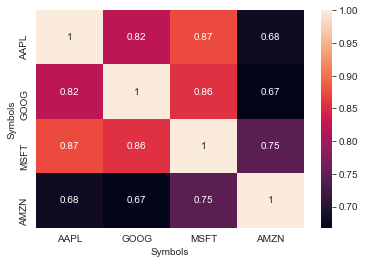

In [17]:
corr=tech_rets.dropna().corr()
se.heatmap(corr,annot=True)

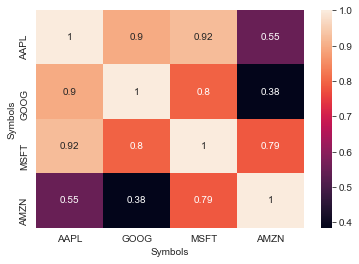

In [18]:
corr=closing.dropna().corr()
se.heatmap(corr,annot=True)

In [19]:
rets=tech_rets.dropna()

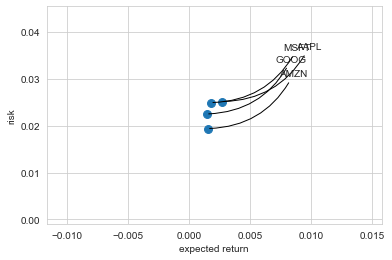

In [20]:
area=np.pi*20

p.scatter(rets.mean(),rets.std(),s=area)
p.xlabel('expected return')
p.ylabel('risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    p.annotate(
        label, 
        xy = (x, y), xytext = (100, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))

In [21]:
rets['AAPL'].quantile(0.05)                  #value at risk (95 % data wil have return greater than it)

-0.03308284476401163

In [22]:
days=365

dt=1/days

mu=rets['GOOG'].mean()

sigma=rets['GOOG'].std()

In [23]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x]=mu*dt
        
        price[x]=price[x-1]+((shock[x]+drift[x])*price[x-1])
    return price    

In [24]:
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-10,1092.660034,1072.322021,1072.979980,1080.380005,1464200,1080.380005
2019-06-11,1101.989990,1077.603027,1093.979980,1078.719971,1436700,1078.719971
2019-06-12,1080.930054,1067.540039,1078.000000,1077.030029,1061000,1077.030029
2019-06-13,1094.170044,1080.150024,1083.640015,1088.770020,1057700,1088.770020
2019-06-14,1092.689941,1080.171997,1086.420044,1085.349976,1111500,1085.349976


Text(0.5, 1.0, 'monte carlo simulation for Google')

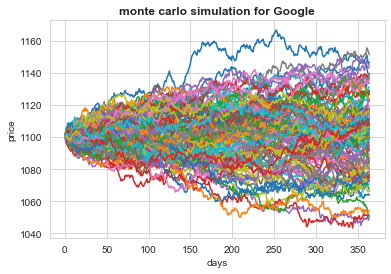

In [25]:
start_price=1100.900024

for run in range(100):
    p.plot(stock_monte_carlo(start_price,days,mu,sigma))
p.xlabel('days')
p.ylabel('price')
p.title('monte carlo simulation for Google',weight='bold')

In [26]:
runs=10000

simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

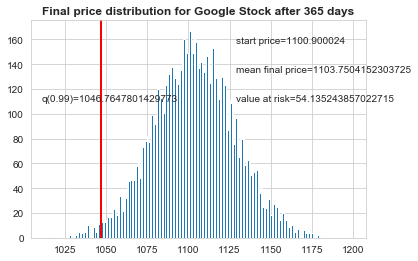

In [27]:
q=np.percentile(simulations,1)

p.hist(simulations,bins=200)
p.figtext(0.6,0.8,s='start price='+str(start_price))
p.figtext(0.6,0.7,s='mean final price='+str(simulations.mean()))
p.figtext(0.6,0.6,s='value at risk='+str(start_price-q))
p.figtext(0.15,0.6,s='q(0.99)='+str(q))
p.axvline(x=q,linewidth=2,color='red')
p.title("Final price distribution for Google Stock after "+str(days)+' days', weight='bold')
p.show()

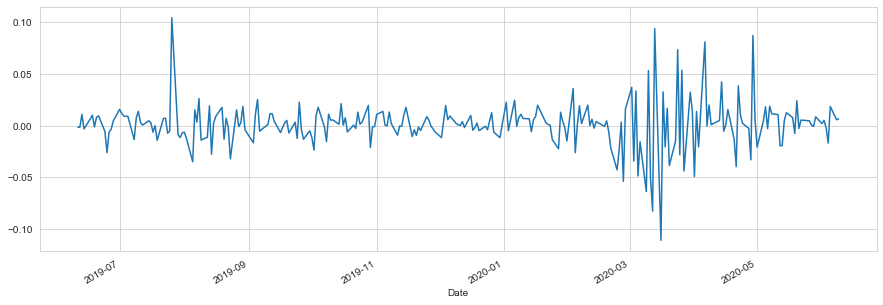

In [28]:
rets['GOOG'].plot(figsize=(15,5))